# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Reading study results
study_results = pd.read_csv(study_results_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
unique_mice_ids = combined_df ["Mouse ID"].nunique()
unique_mice_ids 
print(f'The number of mice: {unique_mice_ids}')

The number of mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_data = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# Displaying the updated number of unique mouse IDs
duplicate_mouse_data

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_data)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = cleaned_df['Mouse ID'].nunique()
print(f'The updated number of mice: {updated_mice_count}')

The updated number of mice: 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_df =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

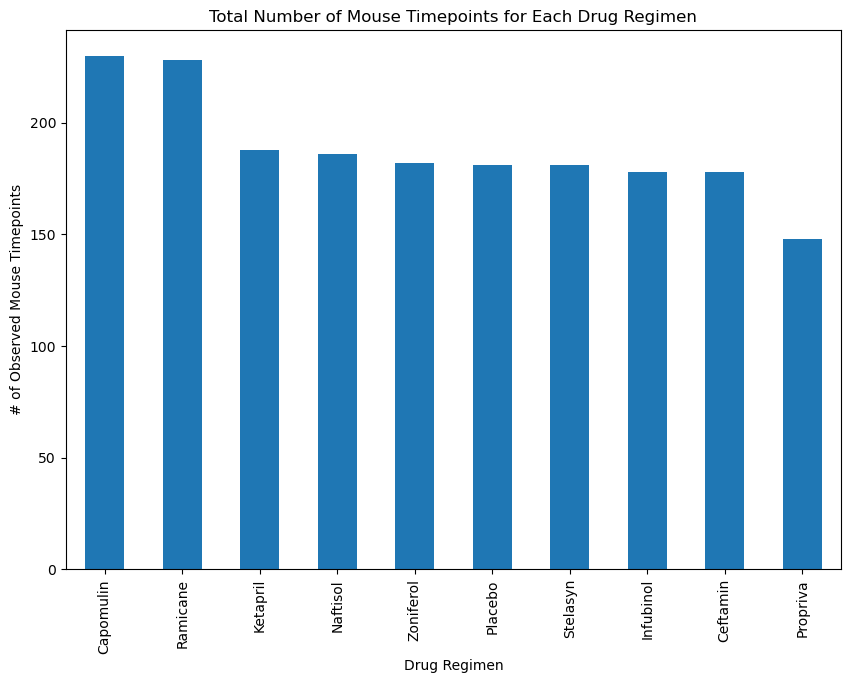

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = cleaned_df['Drug Regimen'].value_counts()

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Mouse Timepoints for Each Drug Regimen")

# Create a Pandas bar plot based on the group series from before and label the title
bar_plot = regimen.plot(kind='bar', figsize=(10,7), rot=90)

# Display the plot
plt.show()

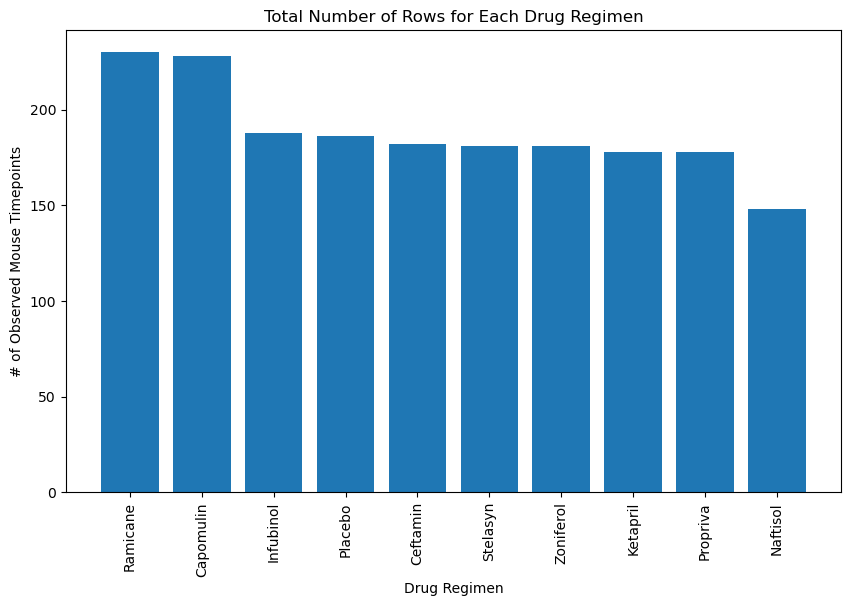

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = cleaned_df["Drug Regimen"].unique()
y_axis = cleaned_df["Drug Regimen"].value_counts() 

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)


# Configure the plot
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

# Set x and y limits
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(y_axis)+10)

# plt.tight_layout()
plt.show()

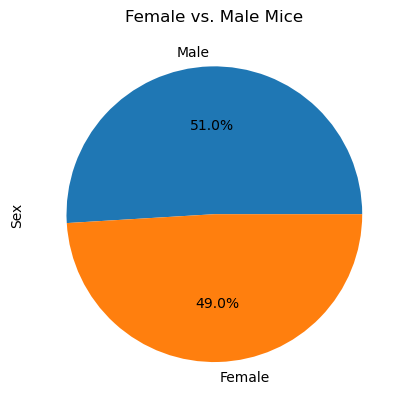

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = cleaned_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")

# Plot and Display
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


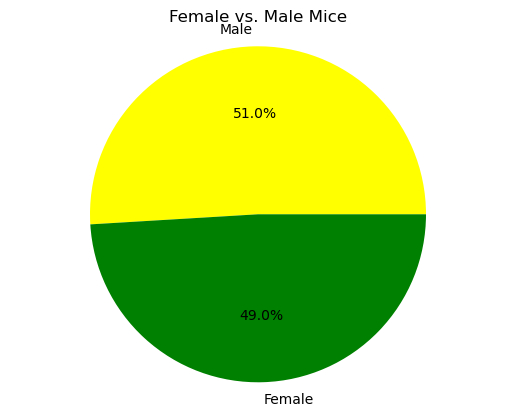

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = cleaned_df["Sex"].value_counts()
colors = ['yellow', 'green']
plt.title("Female vs. Male Mice")
plt.pie(gender_data, labels=gender_data.index, autopct="%1.1f%%", colors=colors)
plt.axis('equal') 

# Display the pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# treatments =  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_df = greatest_tp.merge(cleaned_df, on=['Mouse ID', "Timepoint"], how = "left")

# Display
merged_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

# Loop through each drug treatment
for treatment in treatments:
    final_tumor_volume = merged_tumor_df.loc[merged_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
    
    # Calculate the quartiles for the current treatment
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f'IQR for {treatment}: {iqr}')

    # Calculate lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')

    # Identify and print potential outliers for the current treatment
    outliers = final_tumor_volume.loc[(final_tumor_volume > upper_bound) | (final_tumor_volume < lower_bound)]
    print(f'Number of {treatment} outliers: {len(outliers)}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


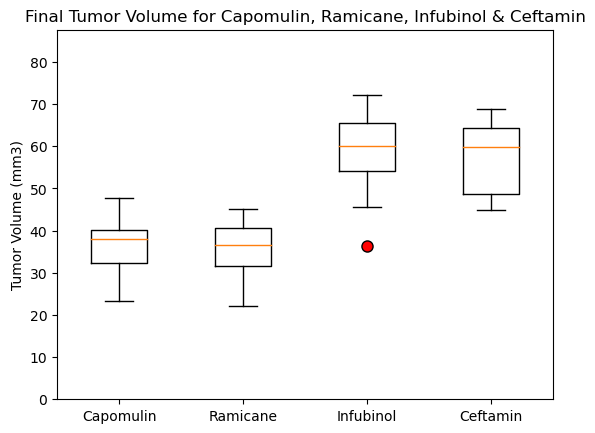

In [18]:
# Create a box plot for all four treatments
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Final Tumor Volume for Capomulin, Ramicane, Infubinol & Ceftamin')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(0, upper_bound) 
plt.show()

## Line and Scatter Plots

In [19]:
# Create & display a dataframe for Capomulin treatment
capomulin_mouse_data = merged_tumor_df[(merged_tumor_df['Drug Regimen'] == 'Capomulin')]
capomulin_mouse_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


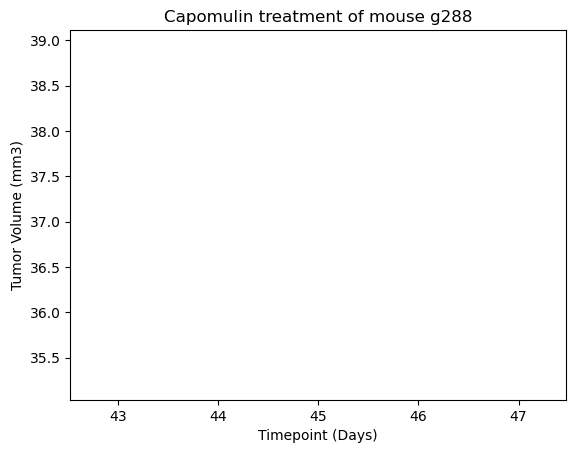

In [20]:
# Select a random mouse ID from the Capomulin DataFrame
mouse_id = 'g288'

# Check if the selected mouse ID has valid data for Capomulin treatment
if mouse_id in capomulin_mouse_data['Mouse ID'].unique():
    # Generate a line plot of tumor volume vs. time point for the selected mouse
    line_plot = capomulin_mouse_data[capomulin_mouse_data["Mouse ID"] == mouse_id]
    x_axis = line_plot["Timepoint"]
    y_axis = line_plot["Tumor Volume (mm3)"]

    fig1, ax1 = plt.subplots()
    plt.title('Capomulin treatment of mouse ' + mouse_id)
    plt.plot(x_axis, y_axis, linewidth=2)
    plt.xlabel('Timepoint (Days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.show()
else:
    print(f"Mouse ID {mouse_id} is not found in the Capomulin treatment data.")



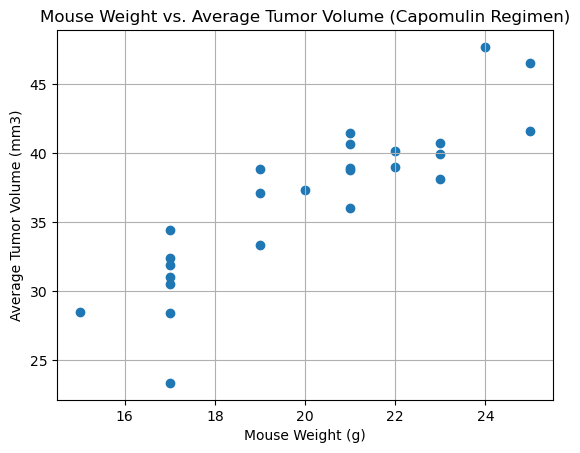

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_mouse_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation coefficient is: 0.88


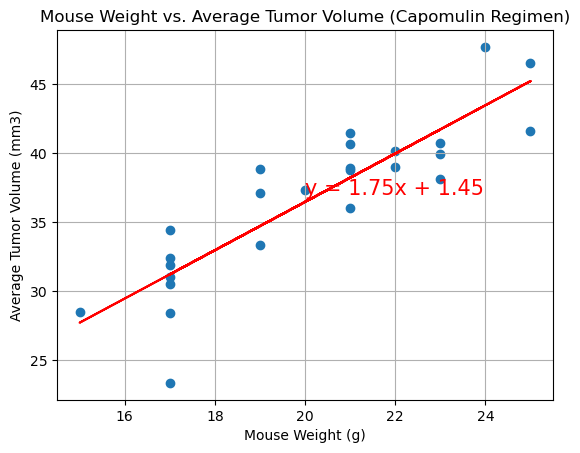

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(mouse_weight, average_tumor_volume)[0], 2)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)

# Calculate the predicted values
regress_values = mouse_weight * slope + intercept

# Create the regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# Plot the regression line
plt.plot(mouse_weight, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (20, 37), fontsize=15, color="red")

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
print(f"The correlation coefficient is: {correlation_coefficient}")
plt.show()